In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('sample_data.csv')

In [3]:
values = df['u']

In [5]:
from statsmodels.tsa.stattools import pacf

In [9]:
pvals = pacf(values, nlags=100)

In [13]:
print(pvals < 0.01)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False  True  True False
 False False  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True False  True False  True False  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True False False  True  True  True  True  True  True  True  True
  True False  True  True  True]


In [19]:
print(len(pvals))

101


Text(0.5, 1.0, 'PACF on Real-World Data with Threshold')

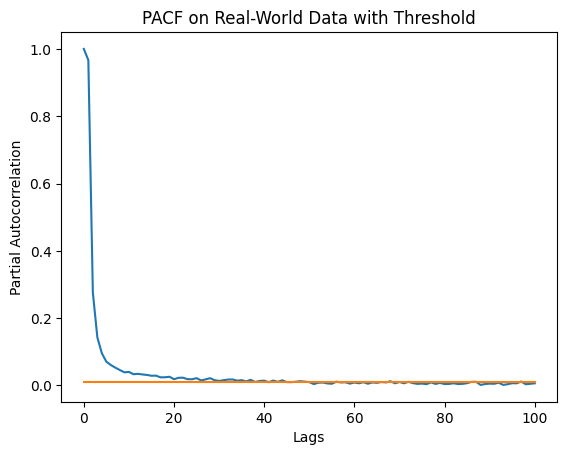

In [21]:
plt.plot(pvals)
plt.plot([0, 100], [0.01, 0.01])
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.title('PACF on Real-World Data with Threshold')

In [4]:
df2 = pd.concat([values.shift(x) for x in range(100)], axis=1)
df2.columns = ['t+'+str(i) for i in range(100)]

In [7]:
print(df2)

             t+0       t+1       t+2       t+3       t+4       t+5       t+6   
0       0.379934       NaN       NaN       NaN       NaN       NaN       NaN  \
1       0.151470  0.379934       NaN       NaN       NaN       NaN       NaN   
2      -0.192402  0.151470  0.379934       NaN       NaN       NaN       NaN   
3       0.101699 -0.192402  0.151470  0.379934       NaN       NaN       NaN   
4       0.090522  0.101699 -0.192402  0.151470  0.379934       NaN       NaN   
...          ...       ...       ...       ...       ...       ...       ...   
491885  3.547087  2.489895  2.737096  2.651897  2.982575  3.347735  3.966601   
491886  2.124233  3.547087  2.489895  2.737096  2.651897  2.982575  3.347735   
491887  2.887112  2.124233  3.547087  2.489895  2.737096  2.651897  2.982575   
491888  3.572781  2.887112  2.124233  3.547087  2.489895  2.737096  2.651897   
491889  2.127863  3.572781  2.887112  2.124233  3.547087  2.489895  2.737096   

             t+7       t+8       t+9  .

In [8]:
result = df2.corr()

In [25]:
print(result['t+0'])

t+0     1.000000
t+1     0.966731
t+2     0.952653
t+3     0.942230
t+4     0.933771
          ...   
t+95    0.833733
t+96    0.833503
t+97    0.833599
t+98    0.833321
t+99    0.833084
Name: t+0, Length: 100, dtype: float64


In [12]:
pacf = result['t+0'].shift(1) - result['t+0']

In [23]:
print(len(pacf))

100


Text(0, 0.5, 'Partial Autocorrelation')

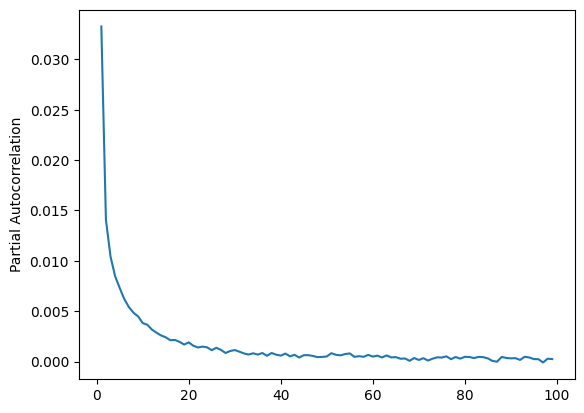

In [24]:
plt.plot([i for i in range(100)], pacf)
plt.ylabel('Partial Autocorrelation')
plt.xlabel('')

In [24]:
print(abs(result['t+0'])[50])

0.004853949007866417


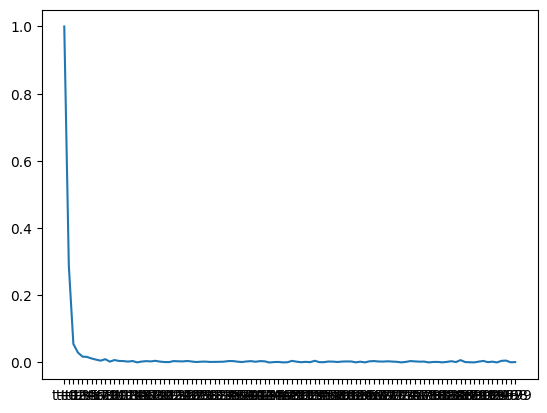

In [19]:
plt.plot(abs(result['t+0']))

In [2]:
import scipy.io
mat = scipy.io.loadmat('csat_data_5_27_2022.mat')

/home/dylaneg/.local/lib/python3.10/site-packages/scipy/io/matlab/_mio.py:227: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


In [40]:
print(mat['T_int'])

[[285.91175153]
 [167.05155449]
 [ 21.86106453]]


In [6]:
print(mat.keys())

dict_keys(['__header__', '__version__', '__globals__', 'battVolt', 'compDir', 'csatDir', 'None', 'pnlTemp', 'temp', 'T_int', 'Ut', 'rho', 'u', 'v', 'w', '__function_workspace__'])


In [23]:
print(mat['u'])

[[ 0.3799339 ]
 [ 0.15147042]
 [-0.19240183]
 ...
 [ 2.88711187]
 [ 3.57278081]
 [ 2.1278631 ]]


In [3]:
u_vals = mat['u']
v_vals = mat['v']
w_vals = mat['w']

In [4]:
u_vals = np.array(u_vals)
v_vals = np.array(v_vals)
w_vals = np.array(w_vals)

In [38]:
print((len(u_vals) / 10) // 3600)

13.0


In [6]:
print(u_vals)

[[ 0.3799339 ]
 [ 0.15147042]
 [-0.19240183]
 ...
 [ 2.88711187]
 [ 3.57278081]
 [ 2.1278631 ]]


In [26]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable


In [27]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(values)

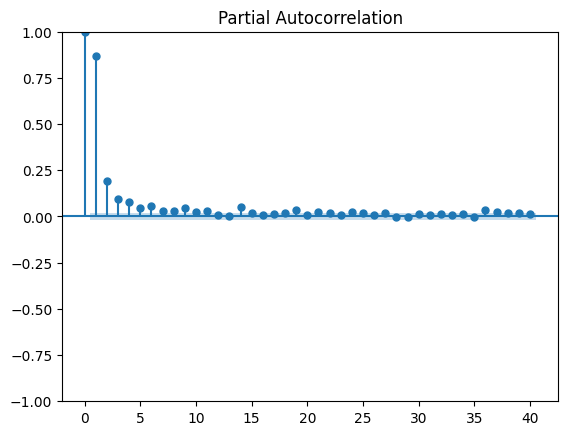

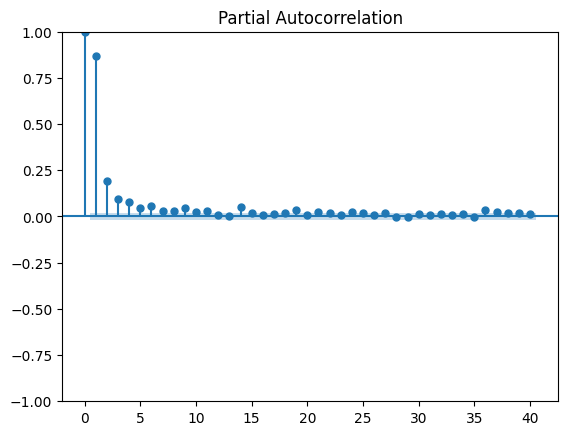

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(values)

In [6]:
from statsmodels.tsa.arima.model import ARIMA

In [7]:
model=ARIMA(u_vals[:10000], order=(1,1,1))
model_fit=model.fit()

In [8]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                10000
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6038.278
Date:                Thu, 02 Nov 2023   AIC                          12082.557
Time:                        12:16:58   BIC                          12104.187
Sample:                             0   HQIC                         12089.878
                              - 10000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6328      0.009     70.927      0.000       0.615       0.650
ma.L1         -0.9119      0.005   -192.997      0.000      -0.921      -0.903
sigma2         0.1959      0.002    115.756      0.0

             0
0     0.000000
1     0.379934
2     0.191275
3    -0.090670
4     0.124261
...        ...
9995  0.725929
9996  0.750777
9997  0.490661
9998  0.471309
9999  0.457589

[10000 rows x 1 columns]


Text(0.5, 1.0, 'ARIMA Sample Time Series Predictions')

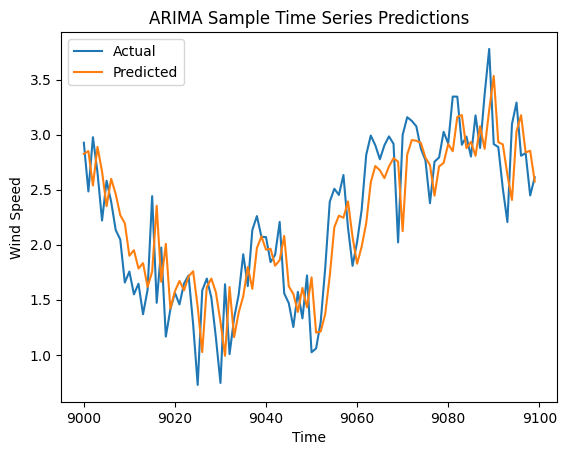

In [9]:
residuals = pd.DataFrame(model_fit.resid)
print(u_vals[:10000] - residuals)
plt.plot((u_vals[:10000] - residuals + residuals)[9000:9100], label="Actual")
plt.plot((u_vals[:10000] - residuals)[9000:9100], label="Predicted")
plt.legend()
plt.xlabel('Time')
plt.ylabel('Wind Speed')
plt.title('ARIMA Sample Time Series Predictions')


In [29]:
print(sum(residuals[0]**2) / len(residuals))

0.2928767960723582


In [24]:
print(u_vals)

[[ 0.3799339 ]
 [ 0.15147042]
 [-0.19240183]
 ...
 [ 2.88711187]
 [ 3.57278081]
 [ 2.1278631 ]]


In [25]:
print(residuals)

               0
0       0.379934
1      -0.228463
2      -0.398583
3       0.156627
4      -0.026307
...          ...
491885  0.801283
491886 -1.264382
491887  0.400283
491888  0.657153
491889 -1.231762

[491890 rows x 1 columns]


In [8]:
from statsmodels.tsa.stattools import adfuller
adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(u_vals[:10000])
print('ADF test statistic:', adf)
print('ADF p-values:', pval)
print('ADF number of lags used:', usedlag)
print('ADF number of observations:', nobs)
print('ADF critical values:', crit_vals)
print('ADF best information criterion:', icbest)

ADF test statistic: -6.9411956177866205
ADF p-values: 1.0240647962622855e-09
ADF number of lags used: 38
ADF number of observations: 9961
ADF critical values: {'1%': -3.4310066595695945, '5%': -2.861830204343065, '10%': -2.5669244706354584}
ADF best information criterion: 11925.54524589801


In [13]:
u_vals = u_vals[1:] - u_vals[:-1]
v_vals = v_vals[1:] - v_vals[:-1]
w_vals = w_vals[1:] - w_vals[:-1]